<a href="https://colab.research.google.com/github/farkoo/Classification-Complexity-Measures/blob/master/feature_extractor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%cd drive/MyDrive/Complexity-Measure/

/content/drive/MyDrive/Complexity-Measure


In [2]:
!pip install gower;

  Created wheel for gower: filename=gower-0.0.5-py3-none-any.whl size=4231 sha256=f48cfc67e12b1799803cbf76aec957f29bef29b02ce4038f937eac080d5ce730
  Stored in directory: /root/.cache/pip/wheels/3e/f9/9a/67122a959a424e9cbb4557a8366c871a30e31cd75f0d003db4
Successfully built gower


In [3]:
from tensorflow.keras.applications import VGG16, Xception, ResNet50V2
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
import numpy as np
import cv2
from tensorflow.keras.datasets import mnist, cifar10
from measures import *
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.svm import SVC
from sklearn import svm

In [ ]:
# %cd drive/MyDrive/Complexity-Measure/ 
from sklearn.datasets import load_iris 
data_iris = load_iris() 
Y_iris = data_iris.target 
X_iris = data_iris.data

from measures import * 
compute_all_measures(X_iris, Y_iris)

/content/drive/MyDrive/Complexity-Measure
F1 score:  0.05862828094263205
F1v score:  0.009504560529310946
F2 score:  0.0063817663817663794
F3 score:  0.12333333333333334
F4 score:  0.043333333333333335
R1 score:  0.0024530613906084773
R2 score:  0.006666666666666667
R3 score:  0.0
N1 score:  0.10666666666666667
N2 score:  0.1579103939429765
N3 score:  0.06000000000000005
N4 score:  0.020000000000000018
LSC score:  0.8166222222222222
Density score:  0.8659060402684564
ClsCoef score:  0.5841352870269286
Hubs score:  0.9254792751658363
T2 score:  0.02666666666666667
T3 score:  0.013333333333333334
T4 score:  0.5
C1 score:  2.220446049250313e-16
C2 score:  0.0


In [ ]:
from sklearn.datasets import load_wine 
data_wine = load_wine() 
Y_wine = data_wine.target 
X_wine = data_wine.data

from measures import * 
compute_all_measures(X_wine, Y_wine)

F1 score:  0.27222450784691526
F1v score:  0.01743848073837549
F2 score:  2.0354274454154463e-05
F3 score:  0.1372549019607843
F4 score:  0.0
R1 score:  0.002329407621616425
R2 score:  0.0056179775280898875
R3 score:  0.0
N1 score:  0.0898876404494382
N2 score:  0.35864303609884296
N3 score:  0.0393258426966292
N4 score:  0.011235955056179803
LSC score:  0.8547531877288221
Density score:  0.866215958864978
ClsCoef score:  0.6069426319915487
Hubs score:  0.9274773940547012
T2 score:  0.07303370786516854
T3 score:  0.056179775280898875
T4 score:  0.7692307692307693
C1 score:  0.011445206973490718
C2 score:  0.018697406258052607


In [ ]:
from sklearn.model_selection import train_test_split
X_train_iris, X_test_iris, Y_train_iris, Y_test_iris = train_test_split(X_iris, Y_iris, test_size = 0.1)
X_train_wine, X_test_wine, Y_train_wine, Y_test_wine = train_test_split(X_wine, Y_wine, test_size = 0.1)

In [ ]:
from sklearn.svm import SVC
model_iris = SVC(kernel = 'linear')
model_iris.fit(X_train_iris, Y_train_iris)
print("Iris dataset train accuracy: " + str(model_iris.score(X_train_iris, Y_train_iris)))
print("Iris dataset test accuracy: " + str(model_iris.score(X_test_iris, Y_test_iris)))
print("-----------------------------------------------")
model_wine = SVC(kernel = 'linear')
model_wine.fit(X_train_wine, Y_train_wine)
print("wine dataset train accuracy: " + str(model_wine.score(X_train_wine, Y_train_wine)))
print("wine dataset test accuracy: " + str(model_wine.score(X_test_wine, Y_test_wine)))

Iris dataset train accuracy: 0.9925925925925926
Iris dataset test accuracy: 1.0
-----------------------------------------------
wine dataset train accuracy: 1.0
wine dataset test accuracy: 0.8888888888888888


In [ ]:
from keras import backend as K

K.clear_session()

# Classify datasets using neural network



In [ ]:
from tensorflow.keras.datasets import mnist, cifar10
import keras
from keras.models import Sequential, Input, Model 
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
# from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from sklearn.metrics import classification_report
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt


In [ ]:
batch_size = 64
epochs = 20
num_classes = 10
classes = 10

## Generate the base model

In [ ]:
def train_model(x, y, z,train_X, train_label, valid_X, valid_label, test_X, test_Y_one_hot, Y_test_label):
  model = Sequential()
  model.add(Conv2D(32, kernel_size = (3, 3), activation = 'linear', input_shape=(x,y,z), padding = 'same'))
  model.add(LeakyReLU(alpha = 0.1))
  model.add(MaxPooling2D((2,2), padding = 'same'))
  model.add(Dropout(0.25))

  model.add(Conv2D(64, (3, 3), activation = 'linear', padding = 'same'))
  model.add(LeakyReLU(alpha = 0.1))
  model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
  model.add(Dropout(0.25))

  model.add(Conv2D(128, (3, 3), activation = 'linear', padding = 'same'))
  model.add(LeakyReLU(alpha = 0.1))                  
  model.add(MaxPooling2D(pool_size=(2, 2), padding = 'same'))
  model.add(Dropout(0.4))

  model.add(Flatten())
  model.add(Dense(128, activation = 'linear'))
  model.add(LeakyReLU(alpha = 0.1)) 
  model.add(Dropout(0.3))
  model.add(Dense(num_classes, activation = 'softmax'))

  model.compile(loss = keras.losses.categorical_crossentropy, optimizer = Adam(), metrics = ['accuracy'])

  history = model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label)) 

  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train','validation'],loc='lower right')
  plt.show()

  test_eval = model.evaluate(test_X, test_Y_one_hot, verbose = 0)
  print('Test loss: ', test_eval[0])
  print('Test accuracy: ', test_eval[1])

  predictes_classes = model.predict(test_X)
  predicted_classes = np.argmax(np.round(predictes_classes), axis = 1)

  target_names = ["Class {}".format(i) for i in range(classes)]
  print(classification_report(Y_test_label, predicted_classes, target_names = target_names))

  return model

## Classify MNIST dataset

In [4]:
(X_train_mnist, Y_train_mnist), (X_test_mnist, Y_test_mnist) = mnist.load_data()
X_train_mnist.shape, Y_train_mnist.shape, X_test_mnist.shape, Y_test_mnist.shape

11501568/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
import random
joined_lists = list(zip(X_train_mnist, Y_train_mnist))
random.shuffle(joined_lists) 
X_train_mnist, Y_train_mnist = zip(*joined_lists)
X_train_mnist = np.asarray(X_train_mnist[0:3000])
Y_train_mnist = np.asarray(Y_train_mnist[0:3000])

joined_lists = list(zip(X_test_mnist, Y_test_mnist))
random.shuffle(joined_lists)
X_test_mnist, Y_test_mnist = zip(*joined_lists)
X_test_mnist = np.asarray(X_test_mnist[0:600])
Y_test_mnist = np.asarray(Y_test_mnist[0:600])

In [ ]:
train_X = X_train_mnist.reshape(-1, 28, 28, 1)
test_X = X_test_mnist.reshape(-1, 28, 28, 1)

train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255
test_X = test_X / 255

from tensorflow.keras.utils import to_categorical

train_Y_one_hot = to_categorical(Y_train_mnist)
test_Y_one_hot = to_categorical(Y_test_mnist)


from sklearn.model_selection import train_test_split
train_X, valid_X, train_label, valid_label = train_test_split(train_X, train_Y_one_hot, test_size = 0.2)

train_X.shape, valid_X.shape, train_label.shape, valid_label.shape

((2400, 28, 28, 1), (600, 28, 28, 1), (2400, 10), (600, 10))

Epoch 1/20
38/38 [==============================] - 5s 121ms/step - loss: 1.8011 - accuracy: 0.3812 - val_loss: 0.7927 - val_accuracy: 0.7783
Epoch 2/20
38/38 [==============================] - 4s 115ms/step - loss: 0.7206 - accuracy: 0.7721 - val_loss: 0.3287 - val_accuracy: 0.8917
Epoch 3/20
38/38 [==============================] - 4s 115ms/step - loss: 0.3480 - accuracy: 0.8908 - val_loss: 0.1609 - val_accuracy: 0.9467
Epoch 4/20
38/38 [==============================] - 4s 115ms/step - loss: 0.2396 - accuracy: 0.9200 - val_loss: 0.1450 - val_accuracy: 0.9500
Epoch 5/20
38/38 [==============================] - 4s 115ms/step - loss: 0.2086 - accuracy: 0.9362 - val_loss: 0.1210 - val_accuracy: 0.9600
Epoch 6/20
38/38 [==============================] - 4s 114ms/step - loss: 0.1686 - accuracy: 0.9488 - val_loss: 0.1238 - val_accuracy: 0.9600
Epoch 7/20
38/38 [==============================] - 4s 115ms/step - loss: 0.1451 - accuracy: 0.9558 - val_loss: 0.0903 - val_accuracy: 0.9733
Epoch 

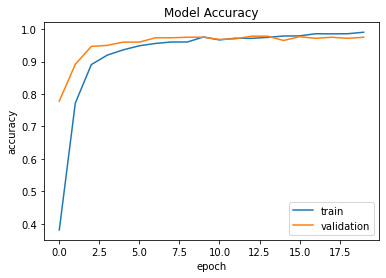

Test loss:  0.06568752229213715
Test accuracy:  0.9833333492279053
              precision    recall  f1-score   support

     Class 0       0.94      1.00      0.97        58
     Class 1       1.00      0.98      0.99        53
     Class 2       1.00      1.00      1.00        63
     Class 3       1.00      1.00      1.00        63
     Class 4       1.00      0.97      0.98        61
     Class 5       0.95      1.00      0.98        40
     Class 6       0.99      0.99      0.99        67
     Class 7       0.99      1.00      0.99        68
     Class 8       0.98      0.98      0.98        64
     Class 9       0.98      0.92      0.95        63

    accuracy                           0.98       600
   macro avg       0.98      0.98      0.98       600
weighted avg       0.98      0.98      0.98       600



In [ ]:
model = train_model(28,28,1,train_X, train_label,valid_X, valid_label, test_X, test_Y_one_hot, Y_test_mnist)

##Classify CIFAR dataset

In [6]:
(X_train_cifar, Y_train_cifar), (X_test_cifar, Y_test_cifar) = cifar10.load_data()
X_train_cifar.shape, Y_train_cifar.shape

170508288/170498071 [==============================] - 2s 0us/step


((50000, 32, 32, 3), (50000, 1))

In [7]:
import random
joined_lists = list(zip(X_train_cifar, Y_train_cifar))
random.shuffle(joined_lists) 
X_train_cifar, Y_train_cifar = zip(*joined_lists)
X_train_cifar = np.asarray(X_train_cifar[0:3000])
Y_train_cifar = np.asarray(Y_train_cifar[0:3000])

joined_lists = list(zip(X_test_cifar, Y_test_cifar))
random.shuffle(joined_lists)
X_test_cifar, Y_test_cifar = zip(*joined_lists)
X_test_cifar = np.asarray(X_test_cifar[0:600])
Y_test_cifar = np.asarray(Y_test_cifar[0:600])

In [ ]:
train_X = X_train_cifar.reshape(-1, 32, 32, 3)
test_X = X_test_cifar.reshape(-1, 32, 32, 3)

train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255
test_X = test_X / 255

from tensorflow.keras.utils import to_categorical

train_Y_one_hot = to_categorical(Y_train_cifar)
test_Y_one_hot = to_categorical(Y_test_cifar)

from sklearn.model_selection import train_test_split
train_X, valid_X, train_label, valid_label = train_test_split(train_X, train_Y_one_hot, test_size = 0.2)

train_X.shape, valid_X.shape, train_label.shape, valid_label.shape

((2400, 32, 32, 3), (600, 32, 32, 3), (2400, 10), (600, 10))

Epoch 1/20
38/38 [==============================] - 7s 162ms/step - loss: 2.2863 - accuracy: 0.1300 - val_loss: 2.2429 - val_accuracy: 0.1817
Epoch 2/20
38/38 [==============================] - 6s 157ms/step - loss: 2.0965 - accuracy: 0.2271 - val_loss: 1.9446 - val_accuracy: 0.2883
Epoch 3/20
38/38 [==============================] - 6s 158ms/step - loss: 1.8766 - accuracy: 0.3029 - val_loss: 1.8184 - val_accuracy: 0.3950
Epoch 4/20
38/38 [==============================] - 6s 158ms/step - loss: 1.7518 - accuracy: 0.3550 - val_loss: 1.7094 - val_accuracy: 0.3850
Epoch 5/20
38/38 [==============================] - 6s 156ms/step - loss: 1.6658 - accuracy: 0.3946 - val_loss: 1.6601 - val_accuracy: 0.4017
Epoch 6/20
38/38 [==============================] - 6s 156ms/step - loss: 1.5836 - accuracy: 0.4200 - val_loss: 1.5855 - val_accuracy: 0.4550
Epoch 7/20
38/38 [==============================] - 6s 155ms/step - loss: 1.4973 - accuracy: 0.4475 - val_loss: 1.5751 - val_accuracy: 0.4433
Epoch 

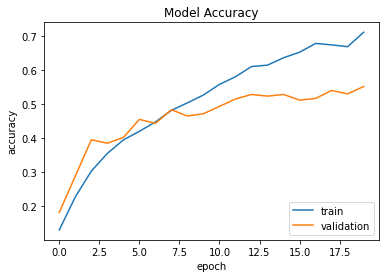

Test loss:  1.4109934568405151
Test accuracy:  0.5199999809265137
              precision    recall  f1-score   support

     Class 0       0.18      0.74      0.30        61
     Class 1       0.61      0.64      0.62        47
     Class 2       0.54      0.31      0.40        61
     Class 3       0.36      0.07      0.11        61
     Class 4       0.53      0.37      0.44        70
     Class 5       0.64      0.29      0.40        56
     Class 6       0.68      0.57      0.62        56
     Class 7       0.62      0.54      0.58        59
     Class 8       0.67      0.51      0.58        67
     Class 9       0.84      0.50      0.63        62

    accuracy                           0.45       600
   macro avg       0.57      0.45      0.47       600
weighted avg       0.57      0.45      0.46       600



In [ ]:
model = train_model(32,32,3,train_X, train_label,valid_X, valid_label, test_X, test_Y_one_hot, Y_test_cifar)

# Classify datasets using PCA and SVM

## MNIST:

In [7]:
PCA_X_mnist = X_train_mnist
PCA_Y_mnist = Y_train_mnist
PCA_X_mnist = PCA_X_mnist/255
X_mnist_flat = PCA_X_mnist.reshape(-1, 28*28)
pca_mnist = PCA(0.9)
principalComponents_mnist = pca_mnist.fit_transform(X_mnist_flat)

PCA_X_mnist_test = X_test_mnist
PCA_Y_mnist_test = Y_test_mnist
PCA_X_mnist_test = PCA_X_mnist_test/255
X_mnist_flat = PCA_X_mnist_test.reshape(-1, 28*28)
principalComponents_mnist_test = pca_mnist.transform(X_mnist_flat)

In [ ]:
pca_model_mnist = SVC(kernel = 'linear')
pca_model_mnist.fit(principalComponents_mnist, PCA_Y_mnist)
print("MNIST(linear SVM) dataset train accuracy: " + str(pca_model_mnist.score(principalComponents_mnist, PCA_Y_mnist)))
print("MNIST(linear SVM) dataset test accuracy: " + str(pca_model_mnist.score(principalComponents_mnist_test, PCA_Y_mnist_test)))

MNIST(linear SVM) dataset train accuracy: 0.9893333333333333
MNIST(linear SVM) dataset test accuracy: 0.875


In [ ]:
pca_model_mnist_l = svm.NuSVC(gamma='auto')
pca_model_mnist_l.fit(principalComponents_mnist, PCA_Y_mnist)
print("MNIST dataset train accuracy: " + str(pca_model_mnist_l.score(principalComponents_mnist, PCA_Y_mnist)))
print("MNIST dataset test accuracy: " + str(pca_model_mnist_l.score(principalComponents_mnist_test, PCA_Y_mnist_test)))

MNIST dataset train accuracy: 0.9146666666666666
MNIST dataset test accuracy: 0.9083333333333333


## CIFAR:

In [8]:
PCA_X_cifar = X_train_cifar
PCA_Y_cifar = Y_train_cifar
PCA_X_cifar = PCA_X_cifar/255
X_cifar_flat = PCA_X_cifar.reshape(-1, 32*32*3)
pca_cifar = PCA(0.9)
principalComponents_cifar = pca_cifar.fit_transform(X_cifar_flat)

PCA_X_cifar_test = X_test_cifar
PCA_Y_cifar_test = Y_test_cifar
PCA_X_cifar_test = PCA_X_cifar_test/255
X_cifar_flat = PCA_X_cifar_test.reshape(-1, 32*32*3)
principalComponents_cifar_test = pca_cifar.transform(X_cifar_flat)

In [ ]:
pca_model_cifar_l = SVC(kernel = 'linear')
pca_model_cifar_l.fit(principalComponents_cifar, PCA_Y_cifar)
print("CIFAR(linear SVM) dataset train accuracy: " + str(pca_model_cifar_l.score(principalComponents_cifar, PCA_Y_cifar)))
print("CIFAR(linear SVM) dataset test accuracy: " + str(pca_model_cifar_l.score(principalComponents_cifar_test, PCA_Y_cifar_test)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CIFAR(linear SVM) dataset train accuracy: 0.5203333333333333
CIFAR(linear SVM) dataset test accuracy: 0.32


In [ ]:
pca_model_cifar = svm.NuSVC(gamma='auto')
pca_model_cifar.fit(principalComponents_cifar, PCA_Y_cifar)
print("CIFAR dataset train accuracy: " + str(pca_model_cifar.score(principalComponents_cifar, PCA_Y_cifar)))
print("CIFAR dataset test accuracy: " + str(pca_model_cifar.score(principalComponents_cifar_test, PCA_Y_cifar_test)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CIFAR dataset train accuracy: 0.9
CIFAR dataset test accuracy: 0.385


In [8]:
FTR_X_mnist = np.load("vgg16_features_mnist.npy")
FTR_X_mnist = FTR_X_mnist
Y_mnist = Y_train_mnist

In [9]:
FTR_X_cifar = np.load("vgg16_features_cifar.npy")
FTR_X_cifar = FTR_X_cifar
Y_cifar = Y_train_cifar

In [ ]:
def one_to_three_dim(x_train, dim):
  img_lst = []
  for i in range(len(x_train)):
    img = cv2.resize(x_train[i], dim, interpolation = cv2.INTER_AREA) 
    img = np.asarray(np.dstack((img, img, img)), dtype=np.uint8)
    img_lst.append(img)
  rgb_arr = np.stack([img_lst],axis=4)
  rgb_arr_to_3d = np.squeeze(rgb_arr, axis=4)
  return rgb_arr_to_3d

In [ ]:
def feature_extractor(images, model, x, y, z):
  feature_list = []
  for i in range(len(images)):
    img_array = np.expand_dims(images[i], axis=0)
    features = model.predict(img_array)
    feature_list.append(features)
  feat_lt = np.reshape(feature_list, (-1, x*y*z))
  return feat_lt

In [ ]:
dim = (32, 32)
rgb_list = one_to_three_dim(X_train_mnist, dim)
print(rgb_list.shape)

(3000, 32, 32, 3)


In [ ]:
vgg = VGG16(weights='imagenet',
            include_top=False,
            input_shape=(32, 32, 3))

for layers in vgg.layers:
  layers.trainable=False

print(vgg.output)


58900480/58889256 [==============================] - 1s 0us/step
KerasTensor(type_spec=TensorSpec(shape=(None, 1, 1, 512), dtype=tf.float32, name=None), name='block5_pool/MaxPool:0', description="created by layer 'block5_pool'")


In [ ]:
vgg_features_mnist = feature_extractor(rgb_list, vgg, 1, 1, 512)
np.save("vgg16_features_mnist.npy", vgg_features_mnist)
vgg_features_cifar = feature_extractor(X_train_cifar, vgg, 1, 1, 512)
np.save("vgg16_features_cifar.npy", vgg_features_cifar)

In [11]:
compute_all_measures(principalComponents_mnist, PCA_Y_mnist)

F1 score:  0.32151394927603233
F1v score:  0.024120391981815235
F2 score:  2.52563872753305e-08
F3 score:  0.3257799671592775




F4 score:  0.0
R1 score:  0.0018479128545658727
R2 score:  0.004
R3 score:  0.0003333333333333333
N1 score:  0.25466666666666665
N2 score:  0.44953934218645114
N3 score:  0.131
N4 score:  0.347
LSC score:  0.9940182222222222
Density score:  0.9693448927420251
ClsCoef score:  0.9757661724609475
Hubs score:  0.9938878942811648
T2 score:  0.028
T3 score:  0.02666666666666667
T4 score:  0.9523809523809523
C1 score:  0.0007879910123644862
C2 score:  0.000451743800870541


In [16]:
principalComponents_cifar.shape, PCA_Y_cifar.shape

((3000, 94), (3000,))

In [15]:
PCA_Y_cifar = np.reshape(PCA_Y_cifar,3000)

In [17]:
compute_all_measures(principalComponents_cifar, PCA_Y_cifar)

F1 score:  0.832094757437763
F1v score:  0.17966589159310556
F2 score:  1.1002582465259495e-09
F3 score:  0.4651591289782244










F4 score:  0.0
R1 score:  0.14105928481626648
R2 score:  0.4673333333333333
R3 score:  0.391
N1 score:  0.8366666666666667
N2 score:  0.5112758524175682
N3 score:  0.7726666666666666
N4 score:  0.45266666666666666
LSC score:  0.9995472222222223
Density score:  0.9826118706235412
ClsCoef score:  0.9811874570340464
Hubs score:  0.9927156414824042
T2 score:  0.03133333333333333
T3 score:  0.03
T4 score:  0.9574468085106383
C1 score:  0.0006000397898764387
C2 score:  0.0003468792544955024


In [10]:
compute_all_measures(FTR_X_mnist, Y_mnist)

F1 score:  0.9921250362016055


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


F1v score:  nan


/content/drive/MyDrive/Complexity-Measure/overlapping.py:150: RuntimeWarning: invalid value encountered in true_divide
  ratio = overlap_/range_


F2 score:  nan
F3 score:  0.49780405405405403




































































































































































































































































































































































































































































































































































































































































































































































































































F4 score:  0.0014062282868722634
R1 score:  0.05200790711063498
R2 score:  0.3596666666666667
R3 score:  0.3016666666666667
N1 score:  0.9513333333333

In [13]:
Y_cifar = np.reshape(Y_cifar, 3000)

In [14]:
compute_all_measures(FTR_X_cifar, Y_cifar)

F1 score:  0.989445979863543


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/content/drive/MyDrive/Complexity-Measure/overlapping.py:150: RuntimeWarning: invalid value encountered in true_divide
  ratio = overlap_/range_


F1v score:  nan
F2 score:  nan
F3 score:  0.49626485568760614














F4 score:  0.0
R1 score:  0.0
R2 score:  0.0
R3 score:  0.0
N1 score:  0.94
N2 score:  0.5285388532462939
N3 score:  0.8983333333333333
N4 score:  0.5273333333333333
LSC score:  0.9996283333333333
Density score:  0.9848840724686007
ClsCoef score:  0.9828816540469674
Hubs score:  0.9875499295278751
T2 score:  0.17066666666666666
T3 score:  0.12266666666666666
T4 score:  0.71875
C1 score:  0.001061196508135298
C2 score:  0.0005959330399840645


# Classify balanced wine dataset using SVM

In [ ]:
from sklearn.datasets import load_wine

data_wine = load_wine()
Y_wine = data_wine.target
X_wine = data_wine.data
X_wine = X_wine[:,0:4]

X_wine_bal = X_wine
Y_wine_bal = Y_wine

In [ ]:
classes, class_freqs = np.unique(Y_wine, return_counts=True)
a = max(class_freqs) - class_freqs[0]
b = max(class_freqs) - class_freqs[1]
c = max(class_freqs) - class_freqs[2]
counter =  a + b + c
while counter > 0:
    r = random.randint(0, X_wine.shape[0])
    if Y_wine[r] == classes[0] and a > 0:
        a = a -1
        X_wine_bal = np.append(X_wine_bal, [X_wine[r]], axis=0)
        Y_wine_bal = np.append(Y_wine_bal, [Y_wine[r]], axis=0)
        counter = counter - 1
    elif Y_wine[r] == classes[1] and b > 0:
        b = b - 1
        X_wine_bal = np.append(X_wine_bal, [X_wine[r]], axis=0)
        Y_wine_bal = np.append(Y_wine_bal, [Y_wine[r]], axis=0)
        counter = counter - 1
    elif Y_wine[r] == classes[2] and c > 0:
        c = c - 1
        X_wine_bal = np.append(X_wine_bal, [X_wine[r]], axis=0)
        Y_wine_bal = np.append(Y_wine_bal, [Y_wine[r]], axis=0)
        counter = counter - 1
classes, class_freqs = np.unique(Y_wine_bal, return_counts=True)
print(classes, class_freqs)

In [ ]:
from sklearn.model_selection import train_test_split
X_train_wine, X_test_wine, Y_train_wine, Y_test_wine = train_test_split(X_wine, Y_wine, test_size = 0.1)
X_train_wine_bal, X_test_wine_bal, Y_train_wine_bal, Y_test_wine_bal = train_test_split(X_wine_bal, Y_wine_bal, test_size = 0.1)

In [ ]:
model_wine = SVC(kernel = 'linear')
model_wine.fit(X_train_wine, Y_train_wine)
print("wine dataset train accuracy: " + str(model_wine.score(X_train_wine, Y_train_wine)))
print("wine dataset test accuracy: " + str(model_wine.score(X_test_wine, Y_test_wine)))
print("-----------------------------------------------")
model_wine_bl = SVC(kernel = 'linear')
model_wine_bl.fit(X_train_wine_bal, Y_train_wine_bal)
print("wine(balanced) dataset train accuracy: " + str(model_wine_bl.score(X_train_wine_bal, Y_train_wine_bal)))
print("wine(balanced) dataset test accuracy: " + str(model_wine_bl.score(X_test_wine, Y_test_wine)))